# TASK 5.3 BUILD AND EVALUATE MODELS

**Contents of this notebook:** Part I: Plan of attack tutorial, Part II: Application to Credit-One classification problem.

## Part I: Plan of attack tutorial

What separates Data Science from Data Analytics is creative problem-solving skills which include learning new skills to solve a problem, like in this case from Sci-Kit Learn resources. 

**Learnings** 
1. Selecting and dividing the data.
2. Building the models and choosing the right model.
3. Making predictions and evaluating the results.

Sci-Kit Learn library: pip install scipy (in Anaconda prompt). It is equivalent to caret but: faster, pipeline easier, models can be serialized for deployment, more metrics , feature & variable selection in form of indices, data in arrays.

**Data Structure:** A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In supervised problem, one or more response variables are stored in the .target member.

4 sections required by Sci-Kit Learn:

| Type | Features | Dependent(Outcomes) |
| --- | --- | --- |
| Train data(eg.75%) | x_train | y_train |
| Test data(eg.75%) | x_test | y_test (groundtruth) |

## 1. Selecting and dividing the data
**STEPS**

**Step 1.1:** Start a new notebook and name it.

**Step 1.2:** Import libraries.

In [1]:
#imports
#numpy, pandas, scipy, sklearn, sqrt, matplotlib, tabulate, seaborn
import numpy as np
import pandas as pd
import scipy #scipy: "Scientific computing tools for Python"
import sklearn
from math import sqrt
import matplotlib.pyplot as plt
from tabulate import tabulate #to tabulate final results
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split #plan of attack: "from sklearn.cross_validation"

**Step 1.3:** Import preprocessed and cleaned data

In [2]:
#data
rawData = pd.read_csv('default_credit_card_clients.csv', header=1)
rawData.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#RENAME OF COLUMNS
rawData.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_STATUS_M9', 'PAY_STATUS_M8', 'PAY_STATUS_M7', 'PAY_STATUS_M6',
       'PAY_STATUS_M5', 'PAY_STATUS_M4', 'BILL_M9', 'BILL_M8', 'BILL_M7', 'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8',
       'PAID_M7', 'PAID_M6', 'PAID_M5', 'PAID_M4', 'DEFAULT']

**Step 1.4:** Examination of the structure: ensure format needed.

In [4]:
rawData.info() #the data was imported as integer even though some where categorized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_STATUS_M9  30000 non-null  int64
 7   PAY_STATUS_M8  30000 non-null  int64
 8   PAY_STATUS_M7  30000 non-null  int64
 9   PAY_STATUS_M6  30000 non-null  int64
 10  PAY_STATUS_M5  30000 non-null  int64
 11  PAY_STATUS_M4  30000 non-null  int64
 12  BILL_M9        30000 non-null  int64
 13  BILL_M8        30000 non-null  int64
 14  BILL_M7        30000 non-null  int64
 15  BILL_M6        30000 non-null  int64
 16  BILL_M5        30000 non-null  int64
 17  BILL_M4        30000 non-null  int64
 18  PAID_M9        30000 non-null  int64
 19  PAID

**Step 1.5:** Select features and dependent variables: with Pandas library.

In R: by using indices in the following format: [rows,columns]. 

In Pandas: Integer location-based indexing for selection by position.

In [5]:
# Selection of columns: Method 1
# variableName = dataframe.iloc[rows,columns]
selection = rawData.iloc[:,1:24] # with ":" all rows are selected.
print(selection)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_STATUS_M9  PAY_STATUS_M8  \
0          20000    2          2         1   24              2              2   
1         120000    2          2         2   26             -1              2   
2          90000    2          2         2   34              0              0   
3          50000    2          2         1   37              0              0   
4          50000    1          2         1   57             -1              0   
...          ...  ...        ...       ...  ...            ...            ...   
29995     220000    1          3         1   39              0              0   
29996     150000    1          3         2   43             -1             -1   
29997      30000    1          2         2   37              4              3   
29998      80000    1          3         1   41              1             -1   
29999      50000    1          2         1   46              0              0   

       PAY_STATUS_M7  PAY_S

In [6]:
# Selection of columns: Method 2
# variableName = dataframe.iloc[rows,columns]
selection = rawData['PAID_M4']
print(selection)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAID_M4, Length: 30000, dtype: int64


In [7]:
# Selection of range of columns: Method 3 
# variableName = dataframe.iloc[rows,columns]
selection = rawData.iloc[:,24:] # with ":" all is selected; then the columns are selected.
print(selection)

       DEFAULT
0            1
1            1
2            0
3            0
4            0
...        ...
29995        0
29996        0
29997        1
29998        1
29999        1

[30000 rows x 1 columns]


1. Select the features:

In [8]:
#features
features = rawData.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24]] #ID taken out
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,...,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


2. Select the dependent variable:

In [9]:
#dependent variable
depVar = rawData['BILL_M9']
print(depVar)

0          3913
1          2682
2         29239
3         46990
4          8617
          ...  
29995    188948
29996      1683
29997      3565
29998     -1645
29999     47929
Name: BILL_M9, Length: 30000, dtype: int64


3. Establish *training* set for x-variable or Feature Space. 
(for this this example: first 1000 lines; for final models: 70/30 split)

In [10]:
#Training Set (Feature Space: X Training)
x_train = (features[: 1000])
x_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,...,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


4. Establish the *training set* y-variable or Dependent Variable (the number of rows much match the X-training set).

In [11]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index) # len: returns the # of items.
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0     3913
1     2682
2    29239
3    46990
4     8617
Name: BILL_M9, dtype: int64

5. Establish the *testing set* for the x-variable or Feature space.

In [12]:
#Testing Set (x_test)
x_test = features[-100:]
x_test_count = len(x_test.index)
print('The number of observations in the feature testing set is:',str(x_test_count))
print(x_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_STATUS_M9  PAY_STATUS_M8  \
29900      20000    1          2         2   29              0              0   
29901      50000    1          2         2   29              1              2   
29902     170000    1          3         2   30              0             -1   
29903     260000    1          1         1   30             -1              0   
29904      60000    1          3         2   30              0              0   

       PAY_STATUS_M7  PAY_STATUS_M6  PAY_STATUS_M5  ...  BILL_M6  BILL_M5  \
29900             -2             -2             -2  ...        0        0   
29901              0              0              0  ...    50590    50248   
29902              0              0              0  ...   161351   126198   
29903             -1             -1             -1  ...       99       99   
29904              0              0              0  ...    58732  

6. Establish ground truth 

In [13]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    16809
29901    50845
29902    10392
29903    27378
29904    54952
Name: BILL_M9, dtype: int64

**Step 1.6:** Cross validation
    
Cross validation must be implemented to prevent overfitting. Sci-kit has a pre-built function.
Remember to import libraries: *from sklearn.model_selection import train_test_split*

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train) #pre-built function

In [15]:
x_train.shape, x_test.shape #to confirm that the split was made.

((750, 23), (250, 23))

**Step 7:** Sci-Kit learn format

Sci-Kit Learn 'Estimator Object'(equivalent to e1071 and caret in R). The linear_model Estimator Object was used to access the LinearRegression algorithm from the sklearn base:

In [16]:
from sklearn.linear_model import LinearRegression

**Step 8:** Tuning parameters and model definition

When defining the model, parameters can be accessed for each specific model.
Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [17]:
#model = LinearRegression(parameters go here)
model = LinearRegression(n_jobs=10)

## 2. Building the models
Process of building a pipeline for creating a model and making predictions.

**STEPS**

**Step 2.0:** Import modules for libraries, estimators,model metrics, cross validation.

**Step 2.1:** Establish variables for defining each model.


In [18]:
#Models
modelRF = RandomForestRegressor()
modelSVR = SVR()
modelLR = LinearRegression()

**Step 2.2:** Variable specifically for your features. (Control of training). Repeat Step 1.5.1

In [19]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,...,BILL_M7,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


**Step 2.3:** Validation of dependent variable. Repeat Step 1.5.2

In [20]:
#dependent variable
print(depVar)

0          3913
1          2682
2         29239
3         46990
4          8617
          ...  
29995    188948
29996      1683
29997      3565
29998     -1645
29999     47929
Name: BILL_M9, Length: 30000, dtype: int64


**Step 2.4:** Buiding the models (training). Syntax: *model.fit(x_train,y_train)*

In [21]:
#Random Forest
modelRF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
#Support Vector Regression
modelSVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
#Linear Regression
modelLR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3. Choosing the right model
Models with the highest scores of *cross_val_score* should be used to make predictions.

**STEPS**

**Step 3.0:** Check import of model metrics of library: from sklearn.model_selection import cross_val_score (Step 1.2)

**Step 3.1:** Pass each trained model and the training sets to the function to obtain the training score. For single metric evaluation:

1. 1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)

2. 2nd value: The time for fitting the estimator on the train set for each cv split.

3. 3rd value:  The time for scoring the estimator on the test set for each cv split. 

*In the following case Linear Regression has the highests scores to predict BILL_M9: "Bill in month 9"

In [24]:
#Random Forest Cross Validation
print(cross_val_score(modelRF, x_train, y_train)) 

[0.95317661 0.91476108 0.93670404 0.9753535  0.91038286]


In [25]:
#Support Vector Regression Validation
print(cross_val_score(modelSVR, x_train, y_train)) 

[-0.16571321 -0.15342555 -0.09234668 -0.11112128 -0.18652706]


In [26]:
#Linear Regression Validation
print(cross_val_score(modelLR, x_train, y_train))

[0.97225495 0.98752476 0.95166075 0.98417552 0.92953638]


**Step 3.2:** Check metrics (eg.Accuracy, Kappa, RMSE and R Squared according to the type of model) to see how the model fit the data. Most of the time this follows the normal R Squared convention for Regression.

Note: There are numerous other ways to check for model overfit and underfit using Sci-Kit learn.

syntaxis: *model.score(X_train,y_train)*

In [27]:
#Model Fitting and Scoring: Random Forest
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score(x_train,y_train)

[0.94982678 0.90815264 0.935995   0.97480447 0.91389102]


0.9922031519492329

In [28]:
#Model Fitting and Scoring: Support Vector Regression
modelSVR.fit(x_train,y_train)
print(cross_val_score(modelSVR, x_train, y_train)) 
modelSVR.score(x_train,y_train)

[-0.16571321 -0.15342555 -0.09234668 -0.11112128 -0.18652706]


-0.13976783723805175

In [29]:
#Model Fitting and Scoring: Linear Regression
modelLR.fit(x_train,y_train)
print(cross_val_score(modelLR, x_train, y_train)) 
modelLR.score(x_train,y_train)

[0.97225495 0.98752476 0.95166075 0.98417552 0.92953638]


0.9707851052986352

## 4. Making predictions and evaluating the results
**Predictions:** Just like in R.

In [30]:
#Predictions: Random Forest
predictionsRF = modelRF.predict(x_test)

In [31]:
#Predictions: Support Vector Regression
predictionsSVR = modelSVR.predict(x_test)

In [32]:
#Predictions: Linear Regression
predictionsLR = modelLR.predict(x_test)

In [33]:
#List Zero for plotting: can be whichever model; is just to copy array structure
list_zero = modelRF.predict(x_test)
list_zero[:]=0

In [34]:
#print(predictionsRF)

**Evaluations:** *sklearn.metrics* contains metric functions

Confirm import of libraries:

*from sklearn.metrics import r2_score* (R2)

*from sklearn.metrics import mean_squared_error* (MSE); in order to make root square:

*from math import sqrt*


In [35]:
#predRsquared = r2_score(y_test,predictions)
predRsquaredRF = r2_score(y_test,predictionsRF)
predRsquaredSVR = r2_score(y_test,predictionsSVR)
predRsquaredLR = r2_score(y_test,predictionsLR)

In [36]:
#rmse = sqrt(mean_squared_error(y_test, predictions))
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))

In [37]:
print("Comparison of models")
print(tabulate([['Random Forest','%.3f'% predRsquaredRF,'%.3f'% rmseRF],['Support Vector Regression','%.3f'% predRsquaredSVR,'%.3f'% rmseSVR],['Linear Regression','%.3f'% predRsquaredLR,'%.3f'% rmseLR]], headers=['Model', 'R Squared', 'RMSE']))

Comparison of models
Model                        R Squared     RMSE
-------------------------  -----------  -------
Random Forest                    0.911  24752.4
Support Vector Regression       -0.188  90484.2
Linear Regression                0.919  23640.7


**Plotting the results:** 

The final step in the model building process (unless the model will be deployed) is plot a comparison between the known values in the test set and the predictions made by the model.

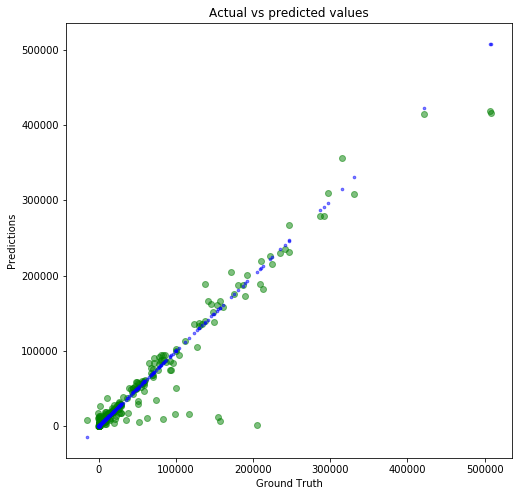

In [38]:
# plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
# plt.xlabel('Ground Truth')
# plt.ylabel('Predictions')
# plt.show()

plt.figure(figsize=(8,8))
plt.scatter(y_test, predictionsRF, color='green', alpha = 0.5)
plt.scatter(y_test, y_test, color='blue',s=7,alpha = 0.5)
plt.title('Actual vs predicted values')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')

plt.show()

## Part II: Application to Credit-One classification problem

## 1. Cleaning and preprocessing data

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

In [196]:
#IMPORT DATA: Note: has to be in the same folder where is the notebook. Default structure: dataframe.
credit = pd.read_csv('default_credit_card_clients.csv', header =1)
credit.head()# quick view sample the dataframe by calling the name in a cell

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [197]:
#RENAME OF COLUMNS AND DROP OF ID
credit.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_STATUS_M9', 'PAY_STATUS_M8', 'PAY_STATUS_M7', 'PAY_STATUS_M6',
       'PAY_STATUS_M5', 'PAY_STATUS_M4', 'BILL_M9', 'BILL_M8', 'BILL_M7', 'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8',
       'PAID_M7', 'PAID_M6', 'PAID_M5', 'PAID_M4', 'DEFAULT']

credit = credit.iloc[:,1:25] # with ":" all rows are selected. Drop of ID.
credit_raw = credit.iloc[:,1:25] # with ":" all rows are selected. Drop of ID.
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,...,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [198]:
#Identification of Nulls
credit.isnull().sum() 

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_STATUS_M9    0
PAY_STATUS_M8    0
PAY_STATUS_M7    0
PAY_STATUS_M6    0
PAY_STATUS_M5    0
PAY_STATUS_M4    0
BILL_M9          0
BILL_M8          0
BILL_M7          0
BILL_M6          0
BILL_M5          0
BILL_M4          0
PAID_M9          0
PAID_M8          0
PAID_M7          0
PAID_M6          0
PAID_M5          0
PAID_M4          0
DEFAULT          0
dtype: int64

In [199]:
#SIMPLIFY. EDUCATION 0,4,5,6 were labeled as others; can be merged.
fil = (credit.EDUCATION == 5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

## 2. Covariance estimation

In [200]:
covMat = credit.cov()
print(covMat)

                  LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL      1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX            1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION     -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE      -7.323670e+03    -0.008014     -0.057954     0.272452   
AGE            1.730767e+05    -0.409726      1.251988    -1.992764   
PAY_STATUS_M9 -3.954593e+04    -0.031685      0.094202     0.011683   
PAY_STATUS_M8 -4.603765e+04    -0.041442      0.115604     0.015122   
PAY_STATUS_M7 -4.443225e+04    -0.038694      0.109088     0.020421   
PAY_STATUS_M6 -4.057181e+04    -0.034411      0.101430     0.020213   
PAY_STATUS_M5 -3.667056e+04    -0.030521      0.087814     0.021074   
PAY_STATUS_M4 -3.509308e+04    -0.024754      0.076186     0.020616   
BILL_M9        2.727020e+09 -1211.694332    909.885257  -902.154685   
BILL_M8        2.570130e+09 -1085.595467    634.798683  -802.517866   
BILL_M

Text(0.5, 1, 'Correlation between variables heat map')

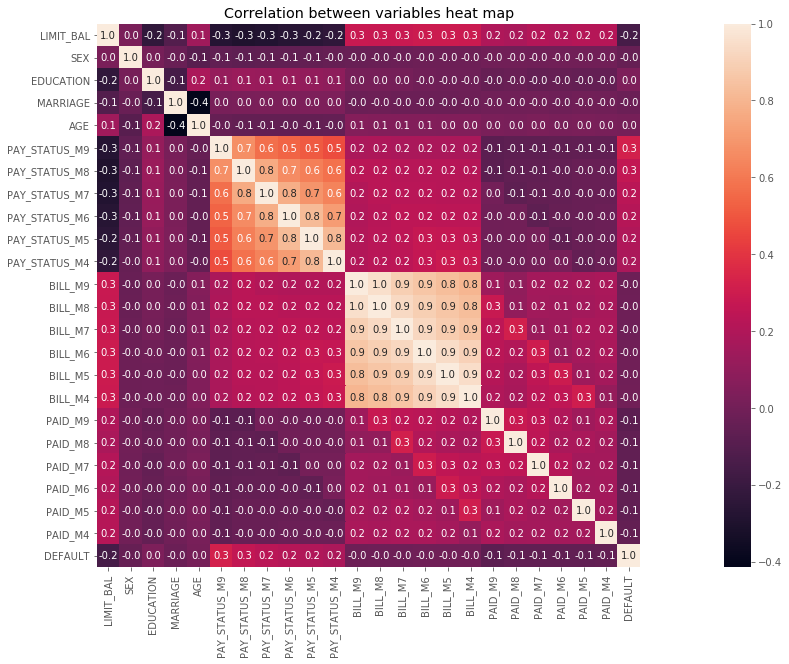

In [202]:
correlation = credit.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )
plt.title('Correlation between variables heat map')
#It seems the bills per month are highly correlated between them, which suggest PCA may be valuable.

## 3. Exploratory Data Analysis (EDA)

In [45]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,...,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [46]:
#Subseting according to default
non_default = credit['DEFAULT']==0
credit_nondefault = credit[non_default]

is_default = credit['DEFAULT']!=0
credit_default = credit[is_default]

print('credit default structure rows-col:',credit_default.shape)
print('credit non default structure rows-col:',credit_nondefault.shape)

credit default structure rows-col: (6636, 24)
credit non default structure rows-col: (23364, 24)


Text(0, 0.5, 'Total credit limit (NT$)')

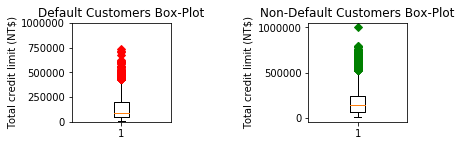

In [47]:
B = credit_default['LIMIT_BAL']
plt.subplot(2,3,4)
plt.boxplot(B,0,'rD')
plt.ylim(0, 1000000)
plt.title('Default Customers Box-Plot')
plt.ylabel('Total credit limit (NT$)')

C = credit_nondefault['LIMIT_BAL']
plt.subplot(2,3,6)
plt.boxplot(C,0,'gD')
plt.title('Non-Default Customers Box-Plot')
plt.ylabel('Total credit limit (NT$)')

The use of limit for total population is: 23.21 %
The use of credit for default population is: 29.41 %
The use of limit for non default population is: 21.92 %


Text(0, 0.5, '% used of Bill Limit')

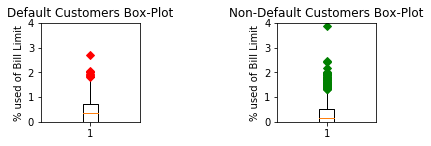

In [48]:
# Set of features
mean = credit['BILL_M4'].sum()/credit['LIMIT_BAL'].sum()
mean = mean * 100
print('The use of limit for total population is:','%.2f'% mean, '%')

mean_def = credit_default['BILL_M4'].sum()/credit_default['LIMIT_BAL'].sum()
mean_def = mean_def * 100
print('The use of credit for default population is:','%.2f'% mean_def, '%')

mean_non = credit_nondefault['BILL_M4'].sum()/credit_nondefault['LIMIT_BAL'].sum()
mean_non = mean_non * 100
print('The use of limit for non default population is:', '%.2f'% mean_non, '%')

percentage_def = credit_default['BILL_M4']/credit_default['LIMIT_BAL']
B = percentage_def
plt.subplot(2,3,4)
plt.boxplot(B,0,'rD')
plt.ylim(0,4)
plt.title('Default Customers Box-Plot')
plt.ylabel('% used of Bill Limit')

percentage_nondef = credit_nondefault['BILL_M4']/credit_nondefault['LIMIT_BAL']
C = percentage_nondef
plt.subplot(2,3,6)
plt.boxplot(C,0,'gD')
plt.ylim(0,4)
plt.title('Non-Default Customers Box-Plot')
plt.ylabel('% used of Bill Limit')

#Insigth: What is happening that bill is more than the limit_balance?

## 4. Feature Engineering: Principal Components Analysis (PCA)

https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

https://www.edureka.co/blog/principal-component-analysis/

https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/

1. Standarize the entry data (Normalization of variables)
2. Obtain eigenvectors and eigenvalues from the covariance matrix.
3. Order eigenvalues descending; and select the "k" eigenvectors with the greatest "k" eigenvectors. ("k" is the number of dimensions of the new space of characteristics).
4. Build the matrix "W" with the "k" eigenvectors selected.
5. Transform the original dataset "X-Standarized" through "W" to obtain the new "k" dimension characteristics.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
#Normalize the data
scaler = StandardScaler()
col_to_norm =['LIMIT_BAL', 'AGE','BILL_M9', 'BILL_M8', 'BILL_M7', 'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8',
       'PAID_M7', 'PAID_M6', 'PAID_M5', 'PAID_M4'] 

scaler.fit(credit[col_to_norm]) #calculus of mean for transformation
credit[col_to_norm] = scaler.transform(credit[col_to_norm])#scaling and normalization of data

credit[col_to_norm]

,LIMIT_BAL,AGE,BILL_M9,BILL_M8,BILL_M7,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [51]:
#PCA application
pca = PCA (n_components = 5) # Can also be defined by obtain a minimun "explained" eg.pca=PCA(.85)
pca.fit(credit[col_to_norm]) #obtain the principal components
pca_col = pca.transform(credit[col_to_norm]) #conversion of data to new PCA dimensions

In [52]:
pca_df = pd.DataFrame(data = pca_col, columns = ['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5'])
pca_df

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5
0,-1.958481,-0.537045,1.329990,-0.175758,0.017492
1,-1.735307,-0.217341,0.863764,-0.280640,0.048594
2,-1.224240,-0.284887,0.213208,-0.008159,0.126947
3,-0.540935,-0.666624,0.097471,0.292369,0.009729
4,-0.848741,0.739026,-1.392033,1.658859,-0.317834
...,...,...,...,...,...
29995,2.576909,-0.689440,-0.305680,0.517722,0.649533
29996,-1.544026,0.187339,-0.724707,0.546432,-0.114662
29997,-1.284849,0.146719,0.250843,0.429783,-0.481175
29998,0.831741,2.421474,0.363127,0.220004,0.539966


In [53]:
print("Shape of Credit PCA", pca_col.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))#5 components
#With 5 components almost 75% of variance is explained

Shape of Credit PCA (30000, 5)
[0.42279426 0.12258339 0.07464922 0.06606715 0.06311574]
suma: 0.7492097568928384


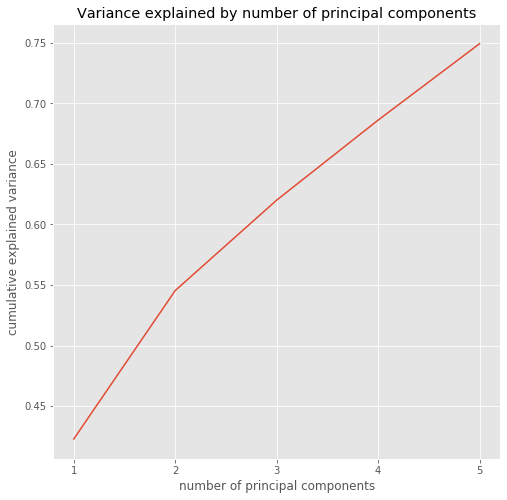

In [54]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance explained by number of principal components')
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.xticks([0,1,2,3,4],('1', '2', '3', '4', '5')) #change of x-axis labels, as python considers zero as 1st element.

plt.show()

In [55]:
credit.drop(labels = ['LIMIT_BAL','AGE','BILL_M9', 'BILL_M8', 'BILL_M7', 'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8','PAID_M7', 'PAID_M6', 'PAID_M5', 'PAID_M4'], axis=1,inplace = True)
credit.head()

,SEX,EDUCATION,MARRIAGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,PAY_STATUS_M4,DEFAULT
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0


In [56]:
credit = pd.concat([credit, pca_df], axis=1)
credit.head()

,SEX,EDUCATION,MARRIAGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,PAY_STATUS_M4,DEFAULT,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5
0,2,2,1,2,2,-1,-1,-2,-2,1,-1.958481,-0.537045,1.329990,-0.175758,0.017492
1,2,2,2,-1,2,0,0,0,2,1,-1.735307,-0.217341,0.863764,-0.280640,0.048594
2,2,2,2,0,0,0,0,0,0,0,-1.224240,-0.284887,0.213208,-0.008159,0.126947
3,2,2,1,0,0,0,0,0,0,0,-0.540935,-0.666624,0.097471,0.292369,0.009729
4,1,2,1,-1,0,-1,0,0,0,0,-0.848741,0.739026,-1.392033,1.658859,-0.317834


## 5. One Hot Encoding

In [57]:
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_STATUS_M9','PAY_STATUS_M8','PAY_STATUS_M7','PAY_STATUS_M6','PAY_STATUS_M5','PAY_STATUS_M4']
credit[categorical_vars] = credit[categorical_vars].astype(str)
credit = pd.get_dummies(credit,columns=categorical_vars,drop_first=True)

In [58]:
credit.shape #the results show variables have been dumified

(30000, 71)

In [59]:
credit.columns.get_loc('DEFAULT')#Identify location of DEFAULT

0

In [60]:
default = credit['DEFAULT']
credit.drop(labels=['DEFAULT'], axis=1,inplace = True)
credit.insert(0, 'DEFAULT', default)

In [61]:
credit.head()

,DEFAULT,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,...,PAY_STATUS_M5_8,PAY_STATUS_M4_-2,PAY_STATUS_M4_0,PAY_STATUS_M4_2,PAY_STATUS_M4_3,PAY_STATUS_M4_4,PAY_STATUS_M4_5,PAY_STATUS_M4_6,PAY_STATUS_M4_7,PAY_STATUS_M4_8
0,1,-1.958481,-0.537045,1.329990,-0.175758,0.017492,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,-1.735307,-0.217341,0.863764,-0.280640,0.048594,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,-1.224240,-0.284887,0.213208,-0.008159,0.126947,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,-0.540935,-0.666624,0.097471,0.292369,0.009729,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,-0.848741,0.739026,-1.392033,1.658859,-0.317834,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
credit.to_csv('credit_pca.csv')

## 6. Classification (Building of models)

Selecting and dividing data

6.1. Select the features:

In [63]:
features
features = credit.iloc[:,1:]
features.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,...,PAY_STATUS_M5_8,PAY_STATUS_M4_-2,PAY_STATUS_M4_0,PAY_STATUS_M4_2,PAY_STATUS_M4_3,PAY_STATUS_M4_4,PAY_STATUS_M4_5,PAY_STATUS_M4_6,PAY_STATUS_M4_7,PAY_STATUS_M4_8
0,-1.958481,-0.537045,1.329990,-0.175758,0.017492,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,-1.735307,-0.217341,0.863764,-0.280640,0.048594,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.224240,-0.284887,0.213208,-0.008159,0.126947,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-0.540935,-0.666624,0.097471,0.292369,0.009729,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,-0.848741,0.739026,-1.392033,1.658859,-0.317834,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


6.2. Select the dependent variable

In [64]:
#dependent variable
depvar = credit.iloc[:,0]
depvar.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

6.3. Establish *training* and *test set* for both x-variable (Feature Space) and y-variable (Dependent Variable) (70/30 split)

In [65]:
#cross-validation
#from sklearn.model_selection import train_test_split
x = features
y = depvar

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) #x and y can be directly

In [66]:
x_test.shape #confirmation of split

(9000, 70)

In [67]:
y_test #ground truth

10747    0
12573    1
29676    0
8856     1
21098    0
        ..
3344     1
14405    0
11459    0
15814    0
23883    0
Name: DEFAULT, Length: 9000, dtype: int64

6.4. Import modules for libraries, estimators, model metrics, cross validation.

6.5. Establish variables for defining each model.

In [68]:
#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
#models
modelLOG = LogisticRegression(solver='liblinear',max_iter=100,random_state=123)
modelDTC = DecisionTreeClassifier()
modelRFC = RandomForestClassifier(n_jobs=12)

In [171]:
#model metrics. Classification: https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import accuracy_score #accuracy: correct predictions vs classification error: incorrect
#(True_Positive+True_Negative)/(True_Positive+False_Positive+True_Negative+False_Positive+False_Negative)

from sklearn.metrics import roc_auc_score #ROC(Receiver Operating Characteristics),AUC (Area Under The Curve)
#It tells how much model is capable of distinguishing between classes. 
#ROC is a probability curve and AUC represents degree or measure of separability.

from sklearn.metrics import precision_score #True_Positive/(True_Positive+False_Positive)
#From all the positive predictions, how many were correct? Perfect precision: no false positives.

from sklearn.metrics import recall_score #True_Positive/(True_Positive+False_Negative)
#From real positives, how many were correct? Perfect recall: no false negatives.

from sklearn.metrics import f1_score #f1=(2*(Precision*Recall))/(Precision+Recall)
#It is a weighted average of the precision and recall.
#f1 score is 1 it’s best and on 0 it’s worst. 

6.6. Buiding the models (training). Syntax: *model.fit(x_train,y_train)*

In [71]:
#Logistic Regression
modelLOG.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#Decision Tree Classifier
modelDTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
#Random Forest Classifier
modelRFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=12, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

6.7.Choosing the best model

Pass each trained model and the training sets to the function to obtain the training score. For single metric evaluation:

1st value: The score array for test scores on each cv split. (Higher is an indicator of a better performing model)

2nd value: The time for fitting the estimator on the train set for each cv split.

3rd value: The time for scoring the estimator on the test set for each cv split.


In [74]:
#Model Scoring: Logistic Regression
print(cross_val_score(modelLOG, x_train, y_train))
modelLOG.score(x_train,y_train)

[0.82261905 0.81333333 0.82238095 0.81809524 0.83238095]


0.823

In [75]:
#Model Scoring: Decision Tree Classifier
print(cross_val_score(modelDTC, x_train, y_train))
modelDTC.score(x_train,y_train)

[0.72952381 0.71761905 0.72714286 0.73309524 0.72190476]


0.9993333333333333

In [76]:
#Model Scoring: Random Forest Classifier
print(cross_val_score(modelRFC, x_train, y_train))
modelRFC.score(x_train,y_train)

[0.81666667 0.80642857 0.81666667 0.81404762 0.82238095]


0.9993333333333333

6.8.Making predictions

In [77]:
#Predictions: Logistic Regression
predictionsLOG = modelLOG.predict(x_test)

In [78]:
#Predictions: Decision Tree Classifier
predictionsDTC = modelDTC.predict(x_test)

In [79]:
#Predictions: Random Forest Classifier
predictionsRFC = modelRFC.predict(x_test)

6.9.First evaluation of the results: metric functions from *sklearn.metrics*

Results: even though in the single score the best were decision trees and random forest, the logistic model was the best after comparing to the ground truth. But also it was the fastest in the single metric.

In [80]:
#Accuracy_score
predaccuracyLOG = accuracy_score(y_test,predictionsLOG)
predaccuracyDTC = accuracy_score(y_test,predictionsDTC)
predaccuracyRFC = accuracy_score(y_test,predictionsRFC)

#Classification error
predclasserrorLOG = 1-predaccuracyLOG
predclasserrorDTC = 1-predaccuracyDTC
predclasserrorRFC = 1-predaccuracyRFC

#ROC-AUC
predaucLOG = roc_auc_score(y_test,predictionsLOG)
predaucDTC = roc_auc_score(y_test,predictionsDTC)
predaucRFC = roc_auc_score(y_test,predictionsRFC)

#Precision
precisionLOG = precision_score(y_test,predictionsLOG)
precisionDTC = precision_score(y_test,predictionsDTC)
precisionRFC = precision_score(y_test,predictionsRFC)

#Recall
recallLOG = recall_score(y_test,predictionsLOG)
recallDTC = recall_score(y_test,predictionsDTC)
recallRFC = recall_score(y_test,predictionsRFC)

#F-1 Score
f1LOG = f1_score(y_test,predictionsLOG)
f1DTC = f1_score(y_test,predictionsDTC)
f1RFC = f1_score(y_test,predictionsRFC)

print("Comparison of models")

print(tabulate([['Logistic','%.3f'%predaccuracyLOG,'%.3f'%predclasserrorLOG,'%.3f'%predaucLOG,'%.3f'%precisionLOG,'%.3f'%recallLOG,'%.3f'%f1LOG],
                ['Decision Tree','%.3f'% predaccuracyDTC,'%.3f'% predclasserrorDTC,'%.3f'%predaucDTC,'%.3f'%precisionDTC,'%.3f'%recallDTC,'%.3f'%f1DTC],
                ['Random Forest','%.3f'% predaccuracyRFC,'%.3f'% predclasserrorRFC,'%.3f'%predaucRFC,'%.3f'%precisionRFC,'%.3f'%recallRFC,'%.3f'%f1RFC]], 
                 headers=['Model','Accuracy','Classification Error','ROC-AUC','Precision','Recall','f-1']))
#

Comparison of models
Model            Accuracy    Classification Error    ROC-AUC    Precision    Recall    f-1
-------------  ----------  ----------------------  ---------  -----------  --------  -----
Logistic            0.819                   0.181      0.65         0.681     0.345  0.458
Decision Tree       0.72                    0.28       0.601        0.374     0.388  0.381
Random Forest       0.813                   0.187      0.648        0.644     0.352  0.455


## 7. Model Tuning

**Model tuning #1**

In [81]:
#Logistic - Model Tuning #1
modelLOG = LogisticRegression(solver='newton-cg',max_iter=100,random_state=12345,verbose=2,n_jobs=5)
modelLOG.fit(x_train,y_train)
print(cross_val_score(modelLOG, x_train, y_train,cv=4))
print(modelLOG.score(x_train,y_train))
predictionsLOG = modelLOG.predict(x_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[0.81980952 0.81638095 0.82228571 0.82857143]
0.8230952380952381


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.5s finished


In [82]:
#Decision Tree Classifier - Model Tuning #1
modelDTC = DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=4,splitter='best')
modelDTC.fit(x_train,y_train)
print(cross_val_score(modelDTC, x_train, y_train,cv=4))
print(modelDTC.score(x_train,y_train))
predictionsDTC = modelDTC.predict(x_test)

[0.81504762 0.81485714 0.81790476 0.82171429]
0.8194761904761905


In [83]:
#Random Forest Classifier - Model Tuning #1
RandomForestClassifier(max_depth=4,n_estimators=60,n_jobs=12) #estimators:number of trees
modelRFC.fit(x_train,y_train)
print(cross_val_score(modelRFC, x_train, y_train,cv=4))
print(modelRFC.score(x_train,y_train))
predictionsRFC = modelRFC.predict(x_test)

[0.81447619 0.81028571 0.81561905 0.81847619]
0.9992857142857143


With this tuning the logistic regression remain similar but is still the best, the decision tree improved and the random forest diminished a bit.

In [84]:
#Accuracy_score
predaccuracyLOG = accuracy_score(y_test,predictionsLOG)
predaccuracyDTC = accuracy_score(y_test,predictionsDTC)
predaccuracyRFC = accuracy_score(y_test,predictionsRFC)

#Classification error
predclasserrorLOG = 1-predaccuracyLOG
predclasserrorDTC = 1-predaccuracyDTC
predclasserrorRFC = 1-predaccuracyRFC

#ROC-AUC
predaucLOG = roc_auc_score(y_test,predictionsLOG)
predaucDTC = roc_auc_score(y_test,predictionsDTC)
predaucRFC = roc_auc_score(y_test,predictionsRFC)

#Precision
precisionLOG = precision_score(y_test,predictionsLOG)
precisionDTC = precision_score(y_test,predictionsDTC)
precisionRFC = precision_score(y_test,predictionsRFC)

#Recall
recallLOG = recall_score(y_test,predictionsLOG)
recallDTC = recall_score(y_test,predictionsDTC)
recallRFC = recall_score(y_test,predictionsRFC)

#F-1 Score
f1LOG = f1_score(y_test,predictionsLOG)
f1DTC = f1_score(y_test,predictionsDTC)
f1RFC = f1_score(y_test,predictionsRFC)

print("Comparison of models")

print(tabulate([['Logistic','%.3f'%predaccuracyLOG,'%.3f'%predclasserrorLOG,'%.3f'%predaucLOG,'%.3f'%precisionLOG,'%.3f'%recallLOG,'%.3f'%f1LOG],
                ['Decision Tree','%.3f'% predaccuracyDTC,'%.3f'% predclasserrorDTC,'%.3f'%predaucDTC,'%.3f'%precisionDTC,'%.3f'%recallDTC,'%.3f'%f1DTC],
                ['Random Forest','%.3f'% predaccuracyRFC,'%.3f'% predclasserrorRFC,'%.3f'%predaucRFC,'%.3f'%precisionRFC,'%.3f'%recallRFC,'%.3f'%f1RFC]], 
                 headers=['Model','Accuracy','Classification Error','ROC-AUC','Precision','Recall','f-1']))

Comparison of models
Model            Accuracy    Classification Error    ROC-AUC    Precision    Recall    f-1
-------------  ----------  ----------------------  ---------  -----------  --------  -----
Logistic            0.819                   0.181      0.65         0.681     0.345  0.459
Decision Tree       0.815                   0.185      0.624        0.719     0.278  0.401
Random Forest       0.814                   0.186      0.649        0.653     0.351  0.457


**Model tuning #2**

In [85]:
#Logistic - Model Tuning #2
modelLOG = LogisticRegression(solver='lbfgs',max_iter=50,random_state=456,verbose=4,n_jobs=5)
modelLOG.fit(x_train,y_train)
print(cross_val_score(modelLOG, x_train, y_train,cv=4))
print(modelLOG.score(x_train,y_train))
predictionsLOG = modelLOG.predict(x_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[0.81961905 0.81714286 0.82247619 0.82780952]
0.823047619047619


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    2.0s finished


In [86]:
#Decision Tree Classifier - Model Tuning #2
modelDTC = DecisionTreeClassifier(ccp_alpha=0.0,criterion='gini',max_depth=10)
modelDTC.fit(x_train,y_train)
print(cross_val_score(modelDTC, x_train, y_train,cv=4))
print(modelDTC.score(x_train,y_train))
predictionsDTC = modelDTC.predict(x_test)

[0.80457143 0.80019048 0.80819048 0.81085714]
0.8458095238095238


In [87]:
#Random Forest Classifier - Model Tuning #1
RandomForestClassifier(max_depth=7,n_estimators=100,n_jobs=10) #estimators:number of trees
modelRFC.fit(x_train,y_train)
print(cross_val_score(modelRFC, x_train, y_train,cv=3))
print(modelRFC.score(x_train,y_train))
predictionsRFC = modelRFC.predict(x_test)

[0.80742857 0.81742857 0.81971429]
0.9992857142857143


In [88]:
#Accuracy_score
predaccuracyLOG = accuracy_score(y_test,predictionsLOG)
predaccuracyDTC = accuracy_score(y_test,predictionsDTC)
predaccuracyRFC = accuracy_score(y_test,predictionsRFC)

#Classification error
predclasserrorLOG = 1-predaccuracyLOG
predclasserrorDTC = 1-predaccuracyDTC
predclasserrorRFC = 1-predaccuracyRFC

#ROC-AUC
predaucLOG = roc_auc_score(y_test,predictionsLOG)
predaucDTC = roc_auc_score(y_test,predictionsDTC)
predaucRFC = roc_auc_score(y_test,predictionsRFC)

#Precision
precisionLOG = precision_score(y_test,predictionsLOG)
precisionDTC = precision_score(y_test,predictionsDTC)
precisionRFC = precision_score(y_test,predictionsRFC)

#Recall
recallLOG = recall_score(y_test,predictionsLOG)
recallDTC = recall_score(y_test,predictionsDTC)
recallRFC = recall_score(y_test,predictionsRFC)

#F-1 Score
f1LOG = f1_score(y_test,predictionsLOG)
f1DTC = f1_score(y_test,predictionsDTC)
f1RFC = f1_score(y_test,predictionsRFC)

print("Comparison of models")

print(tabulate([['Logistic','%.3f'%predaccuracyLOG,'%.3f'%predclasserrorLOG,'%.3f'%predaucLOG,'%.3f'%precisionLOG,'%.3f'%recallLOG,'%.3f'%f1LOG],
                ['Decision Tree','%.3f'% predaccuracyDTC,'%.3f'% predclasserrorDTC,'%.3f'%predaucDTC,'%.3f'%precisionDTC,'%.3f'%recallDTC,'%.3f'%f1DTC],
                ['Random Forest','%.3f'% predaccuracyRFC,'%.3f'% predclasserrorRFC,'%.3f'%predaucRFC,'%.3f'%precisionRFC,'%.3f'%recallRFC,'%.3f'%f1RFC]], 
                 headers=['Model','Accuracy','Classification Error','ROC-AUC','Precision','Recall','f-1']))

Comparison of models
Model            Accuracy    Classification Error    ROC-AUC    Precision    Recall    f-1
-------------  ----------  ----------------------  ---------  -----------  --------  -----
Logistic            0.818                   0.182      0.648        0.68      0.343  0.455
Decision Tree       0.81                    0.19       0.635        0.645     0.32   0.428
Random Forest       0.813                   0.187      0.651        0.644     0.358  0.461


## 8. Model Evaluation
After fine-tuning and comparing 3 algorithms of classification, the selected model is logistic.

#Selected model
modelLOG = LogisticRegression(solver='lbfgs',max_iter=50,random_state=456,verbose=4,n_jobs=5)
modelLOG.fit(x_train,y_train)
print(cross_val_score(modelLOG, x_train, y_train,cv=4))
print(modelLOG.score(x_train,y_train))
predictionsLOG = modelLOG.predict(x_test)

In [89]:
predaccuracyLOG = accuracy_score(y_test,predictionsLOG)*100
predclasserrorLOG = (1-predaccuracyLOG)*100
predaucLOG = roc_auc_score(y_test,predictionsLOG)*100
precisionLOG = precision_score(y_test,predictionsLOG)*100
recallLOG = recall_score(y_test,predictionsLOG)*100
f1LOG = f1_score(y_test,predictionsLOG)*100

print('Final Metrics for Logistic Model:')
print('Accuracy:','%.2f'%predaccuracyLOG,'%')
print('AUC-ROC:','%.2f'%predaucLOG,'%')
print('Precision:','%.2f'%precisionLOG,'%')
print('Recall:','%.2f'%recallLOG,'%')
print('F1-Score:','%.2f'%f1LOG,'%')

Final Metrics for Logistic Model:
Accuracy: 81.80 %
AUC-ROC: 64.82 %
Precision: 67.96 %
Recall: 34.25 %
F1-Score: 45.55 %


In [181]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictionsLOG))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.68      0.34      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [179]:
#Calculations for confusion matrix and confirmation of metrics
prediction = pd.DataFrame(data = predictionsLOG)
prediction.columns = ['PREDICTION']

real = pd.DataFrame(data = y_test)
real.columns = ['REAL']
real = real.reset_index(drop = True)
merge = pd.concat([real,prediction], axis=1)

merge['SUM'] = merge['REAL']+ merge['PREDICTION']

def f(row):
    if row['SUM'] == 2:
        val = 'TrueP'
    elif row['SUM'] == 0:
        val = 'TrueN'
    elif row['REAL'] == 1:
        val = 'FalseN'
    else:
        val = 'FalseP'
    return val
merge['CATEGORY'] = merge.apply(f, axis=1)

TrueP = merge.loc[merge['CATEGORY'] == 'TrueP','CATEGORY'].count()
TrueN = merge.loc[merge['CATEGORY'] == 'TrueN','CATEGORY'].count()
FalseN = merge.loc[merge['CATEGORY'] == 'FalseN','CATEGORY'].count()
FalseP = merge.loc[merge['CATEGORY'] == 'FalseP','CATEGORY'].count()


confirm_recall=(TrueP/(TrueP+FalseN))
confirm_recall

0.3425

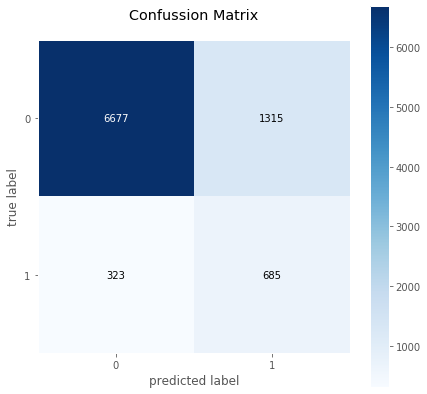

In [190]:
#Plot non-normalized confusion matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary = np.array([[TrueN, FalseN],
                   [FalseP, TrueP]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                figsize=(7, 7),
                                show_absolute=True,
                                colorbar=True)
plt.title('Confussion Matrix')
plt.show()

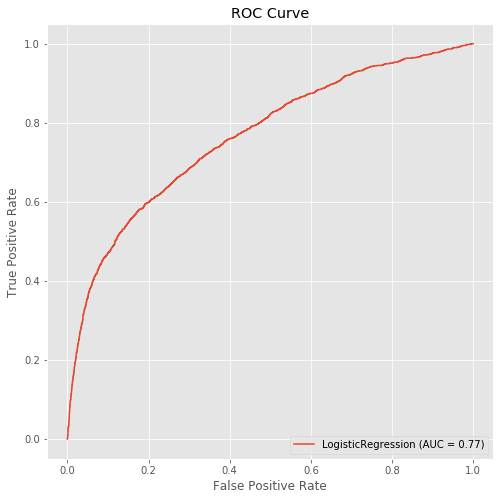

In [91]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(modelLOG, x_test, y_test)

plt.title('ROC Curve')
plt.show()